In [3]:
# import os
# import json
# import pprint as pp
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from bayesianmm.data import mean_match
from bayesianmm.run import run

from bayesianmm.visualize import *
from bayesianmm.eval import *

fig 2

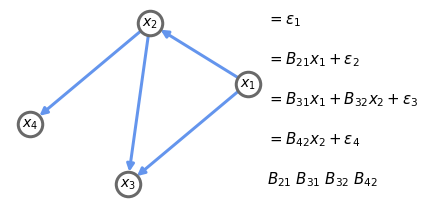

In [215]:
import networkx as nx
d = nx.DiGraph()
d.add_nodes_from(list(range(4)))

for (i, j) in [(0,1), (0,2), (1,2), (1,3)]:
	d.add_edge(i, j)

dict_l = {node: r'$x_{}$'.format(str(node+1)) for node in range(4)}
nw_ax = plt.subplot2grid((4, 4), (0, 0), colspan=12, rowspan=12)
plt.gcf().set_size_inches(6, 3)

# pos = nx.circular_layout(d)
# pos = nx.kamada_kawai_layout(d)
# pos = nx.shell_layout(d)
pos = {0:[6,0.45], 1:[1,0.6], 2:[-0.15, 0.2], 3:[-5.15, 0.35]}
nx.draw(d, pos=pos, node_color='w', ax=nw_ax, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1, edge_color='cornflowerblue', edgecolors='dimgrey', linewidths=3, width=3, node_size=600, font_size=15, arrowsize=15)
nx.draw_networkx_labels(d, pos, labels=dict_l, ax=nw_ax, font_size=14)
plt.annotate(r'$=\epsilon_1$', [7,0.6], fontsize=15)
plt.annotate(r'$=B_{21}x_1+\epsilon_2$', [7,0.5], fontsize=15)
plt.annotate(r'$=B_{31}x_1+B_{32}x_2+\epsilon_3$', [7,0.4], fontsize=15)
plt.annotate(r'$=B_{42}x_2+\epsilon_4$', [7,0.3], fontsize=15)
plt.annotate(r'$B_{21}$ $B_{31}$ $B_{32}$ $B_{42}$', [7,0.2], fontsize=15)
# plt.title(r'DAG $\mathcal{G}$ and targets of $a^*$')
plt.tight_layout()
plt.savefig('fig/dag1.pdf')

fig 4

In [2]:
# seed = 1234
# np.random.seed(seed)

# generate problem instantiation
p = 10
sigma_square = np.ones(p)
DAG_type = 'random'

problem = mean_match(nnodes=p, sigma_square=sigma_square, S=5, DAG_type=DAG_type, std=True, seed=1234) #target=[i + 10 for i in range(10)]


there are no undirected edges
plotting...


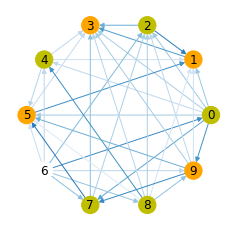

In [3]:
import bayesianmm.visualize
from importlib import reload
reload(bayesianmm.visualize)
bayesianmm.visualize.draw(
	problem.DAG, 
	colored_set = set(i for i in range(problem.nnodes) if problem.a_target[i]!=0), 
	affected_set=set().union(*[problem.DAG.descendants_of(i) for i in range(problem.nnodes) if problem.a_target[i]!=0]),
	edge_weights=problem.B.T
	)
# plt.savefig('{}/dag.png'.format(savepath))

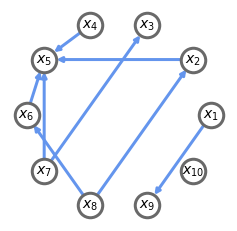

In [8]:
import networkx as nx
d = nx.DiGraph()
d.add_nodes_from(list(range(p)))
for (i, j) in problem.DAG.arcs:
	d.add_edge(i, j)
color_d = []
for i,j in d.edges:
	color_d.append(abs(problem.B.T[i,j]))
dict_l = {node: r'$x_{}$'.format(str(node+1)) for node in range(p-1)}
dict_l[9] = r'$x_{10}$' 
nw_ax = plt.subplot2grid((4, 4), (0, 0), colspan=12, rowspan=12)
plt.gcf().set_size_inches(4, 4)
pos = nx.circular_layout(d)
nx.draw(d, pos=pos, node_color='w', ax=nw_ax, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1, edge_color='cornflowerblue', edgecolors='dimgrey', linewidths=3, width=3, node_size=600, font_size=15)
nx.draw_networkx_labels(d, pos, labels=dict_l, ax=nw_ax, font_size=14)
# plt.title(r'DAG $\mathcal{G}$ and targets of $a^*$')
plt.savefig('fig/dag.pdf')


In [5]:
# options for testing
opts = Namespace(N=1, T=50, W=0, R=20, nS=0, verbose=False)

appendix

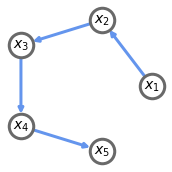

In [18]:
import networkx as nx
d = nx.DiGraph()
d.add_nodes_from(list(range(5)))
for (i, j) in [(0,1), (1,2), (2,3), (3,4)]:
	d.add_edge(i, j)

dict_l = {node: r'$x_{}$'.format(str(node+1)) for node in range(5)}

nw_ax = plt.subplot2grid((4, 4), (0, 0), colspan=12, rowspan=12)
plt.gcf().set_size_inches(2.5, 2.5)
pos = nx.circular_layout(d)
nx.draw(d, pos=pos, node_color='w', ax=nw_ax, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1, edge_color='cornflowerblue', edgecolors='dimgrey', linewidths=3, width=3, node_size=600, font_size=15)
nx.draw_networkx_labels(d, pos, labels=dict_l, ax=nw_ax, font_size=14)
plt.tight_layout()
# plt.title(r'DAG $\mathcal{G}$ and targets of $a^*$')
plt.savefig('fig/path_graph.pdf')


## Importance Weight Strategy

In [6]:
# opts.active = False
# A_passive, Prob_passive = run(problem, opts)

# opts.active = True
# opts.acq = 'ivr'
# opts.comp = 'iw'
# A_ivr_iw, Prob_ivr_iw = run(problem, opts)

opts.active = True
opts.known_noise = True
opts.acq = 'ivr'
opts.comp = 'sphere'
A_ivr_sphere, Prob_ivr_sphere = run(problem, opts)

# opts.acq = 'ml2'
# A_ml2, Prob_ml2 = run(problem, opts)

# opts.active = True
# opts.acq = 'mestvr'
# A_mestvr, Prob_mestvr = run(problem, opts)

# opts.active = True
# opts.acq = 'svr'
# A_svr, Prob_svr = run(problem, opts)

100%|██████████| 20/20 [00:08<00:00,  2.28it/s]


In [5]:
opts.active = True
opts.acq = 'ivr'
opts.comp = 'sphere_half'
A_ivr_sphere_half, Prob_ivr_sphere_half = run(problem, opts)

100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


<Figure size 432x288 with 0 Axes>

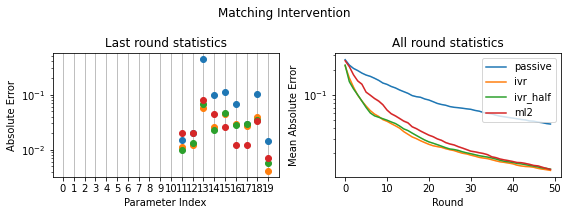

In [8]:
plot_matching_intervention(problem, opts, 
	passive=Prob_passive,
	ivr=Prob_ivr_sphere,
	ivr_half=Prob_ivr_sphere_half,
	# ivr_iw=Prob_ivr_iw,
	# ivr_iw2=Prob_ivr_iw2,
	# mestvr=Prob_mestvr,
	# svr=Prob_svr,
	ml2=Prob_ml2,
	# figsize=(20,6)
	);

## VR strategy

In [5]:
opts.active = False
A_passive, Prob_passive = run(problem, opts)

opts.active = 'de'
opts.k = 5
opts.acq = 'ivr'
opts.comp = 'sphere'
A_ivr_sphere_k, Prob_ivr_sphere_k = run(problem, opts)

opts.active = True
opts.acq = 'ivr'
opts.comp = 'sphere'
A_ivr_sphere, Prob_ivr_sphere = run(problem, opts)

# opts.acq = 'ml2'
# A_ml2, Prob_ml2 = run(problem, opts)


100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


<Figure size 432x288 with 0 Axes>

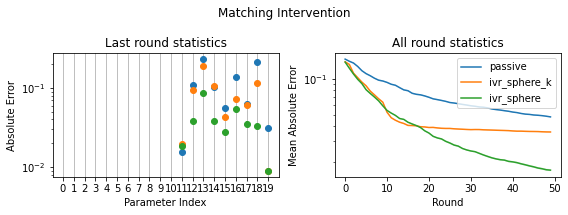

In [6]:
plot_matching_intervention(problem, opts, passive=Prob_passive, 
	ivr_sphere_k=Prob_ivr_sphere_k,
	ivr_sphere=Prob_ivr_sphere,
	# ml2=Prob_ml2,
	# figsize=(20,6)
	);

## Parameter Estimation

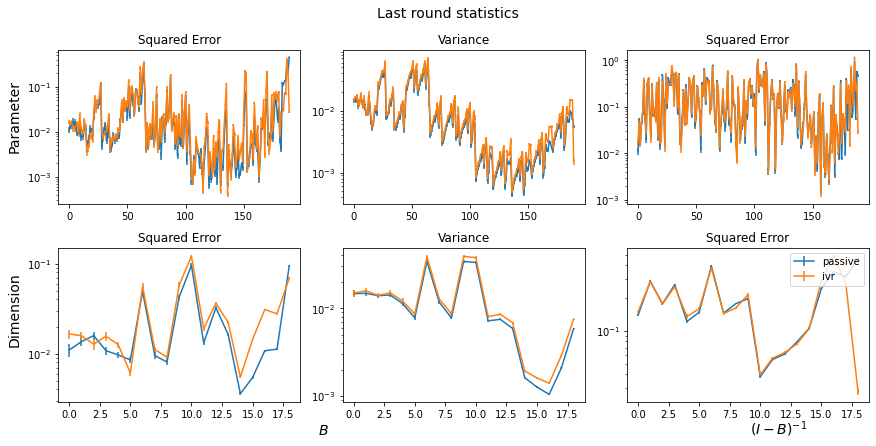

In [17]:
plot_last_round(problem, opts, passive=Prob_passive, ivr=Prob_ivr)
# plt.savefig('{}/last_round.png'.format(savepath))

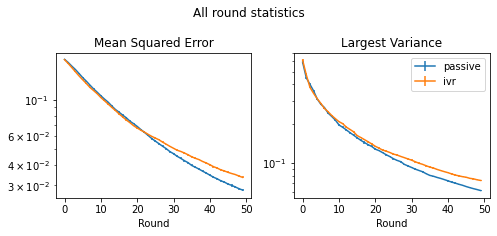

In [19]:
plot_all_round(problem, opts, passive=Prob_passive, ivr=Prob_ivr)
# plt.savefig('{}/all_round.png'.format(savepath))

## Picked Intervention

In [11]:
# plot_picked_interventions(problem, opts, passive=A_passive, ivr=A_ivr_sphere)
# # plt.savefig('{}/picked_interventions.png'.format(savepath))

In [7]:
A_avg = [np.array(A_ivr_sphere).mean(axis=0)]

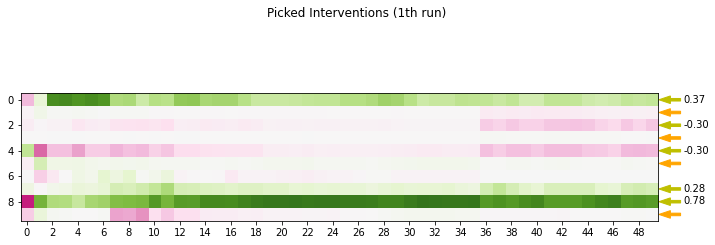

In [8]:
plot_picked_intervention_j(problem, opts, A_ivr_sphere, 1, figsize = (10,4))
# plt.savefig('{}/active_picked_interventions.png'.format(savepath))

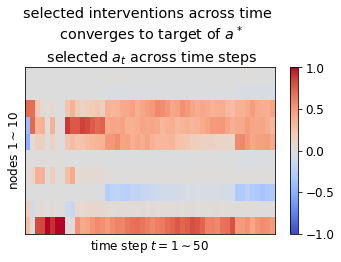

In [44]:
fig, ax = plt.subplots(1,1,figsize=(5,3.8))
plt.rc('font', size=12)

im = ax.imshow(np.concatenate(A_ivr_sphere[0], axis=1)[::-1], extent=[0,50,0,10], aspect='auto', norm=None, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel(r'time step $t = 1 \sim 50$')
# plt.xlabel(r'time step $t$ (colored by $a_t$)')
plt.ylabel(r'nodes $1\sim {10}$')
plt.title('selected interventions across time \n converges to target of $a^*$ \n selected $a_t$ across time steps')
cbar = plt.colorbar(im,ticks=[-1, -0.5, 0, 0.5, 1])
# cbar.ax.set_yticklabels([-1, -0.5, 0, 0.5, 1])  
ax.set_xticks([])
ax.set_yticks([])
# ax.set_yticklabels([10-i for i in range(11)])

# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
# ax.spines.left.set_visible(False)
# ax.spines.bottom.set_visible(False)
plt.tight_layout()
plt.savefig('fig/heatmap1.pdf')

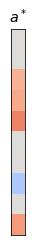

In [45]:
fig, ax = plt.subplots(1,1,figsize=(0.25,3.8))
plt.rc('font', size=12)

ax.imshow(problem.a_target[::-1], norm=None,  extent=[0,1,0,10], aspect='auto', cmap='coolwarm',vmin=-1, vmax=1)
ax.set_yticks([])
ax.set_xticks([])
plt.title(r'$a^*$')
plt.savefig('fig/heatmap2.pdf')

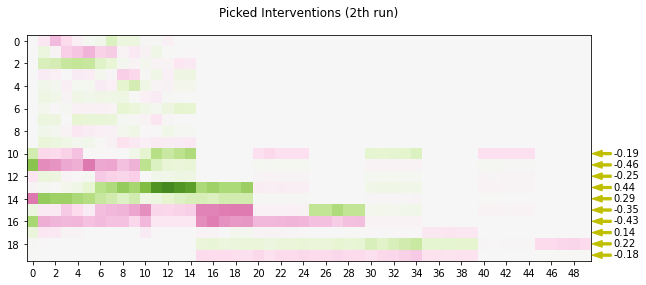

In [7]:
plot_picked_intervention_j(problem, opts, A_ivr_sphere_k, 2, figsize = (16,4))
# plt.savefig('{}/active_picked_interventions.png'.format(savepath))

## Matching Intervention

<Figure size 432x288 with 0 Axes>

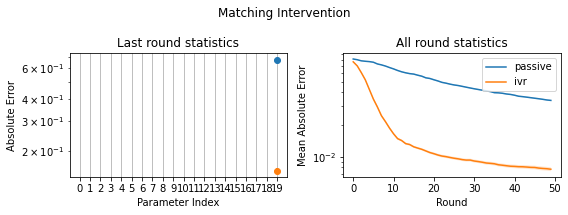

In [23]:
plot_matching_intervention(problem, opts, passive=Prob_passive, ivr=Prob_ivr);

## Shifted Mean

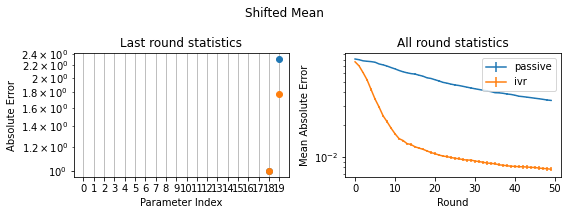

In [24]:
plot_shifted_mean(problem, opts, passive=Prob_passive, ivr=Prob_ivr)

## Misc

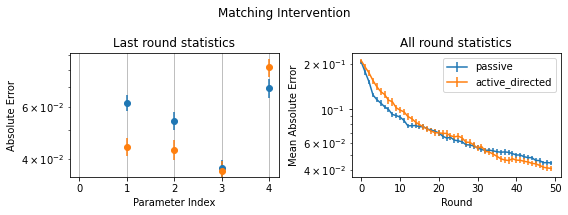

In [45]:
a_target = np.random.uniform(-1, 1, (problem.nnodes, 1))
# from copy import deepcopy
# a_target = deepcopy(problem.a_target)
# for i in range(problem.nnodes):
# 	# if problem.a_target[i] == 0:
# 	if i != 4:
# 		a_target[i] = 0
# a_target = a_target / np.linalg.norm(a_target)
mu_target = np.matmul(problem.A, a_target)

# from copy import deepcopy
# mu_target = deepcopy(problem.mu_target)
# for i in range(problem.nnodes):
# 	# if problem.a_target[i] == 0:
# 	if i != 4:
# 		mu_target[i] = 0
# # a_target = a_target / np.linalg.norm(a_target)
# a_target = np.matmul(np.eye(problem.nnodes)-problem.B, mu_target)

fig, axs = plt.subplots(1,2, figsize=(8,3))

Errs_passive = []
Errs_active = []

for r in range(50):
	errs = abs(np.dot(np.eye(problem.nnodes)-np.array(Prob_passive[r][-1]['mean']), mu_target) - a_target)
	Errs_passive.append(errs)	

	errs = abs(np.dot(np.eye(problem.nnodes)-np.array(Prob_active[r][-1]['mean']), mu_target) - a_target)
	Errs_active.append(errs)

axs[0].set_yscale('log')
axs[0].errorbar(range(problem.nnodes), np.array([np.concatenate(e) for e in Errs_passive]).mean(axis=0), .1*np.array([np.concatenate(e) for e in Errs_passive]).std(axis=0), label='1', fmt='o')
axs[0].errorbar(range(problem.nnodes), np.array([np.concatenate(e) for e in Errs_active]).mean(axis=0), .1*np.array([np.concatenate(e) for e in Errs_active]).std(axis=0), label='2', fmt='o')
axs[0].set_xlabel("Parameter Index")
axs[0].set_ylabel("Absolute Error")
axs[0].set_xticks(range(problem.nnodes))
axs[0].grid(visible=True, axis='x')
axs[0].set_title("Last round statistics")

MSE_passive = []
MSE_active = []

runs = len(Prob_passive)
for r in range(runs):
	mse = []
	for prob in Prob_passive[r]:
		errs = abs(np.dot(np.eye(problem.nnodes)-np.array(prob['mean']), mu_target) - a_target)
		mse.append(np.concatenate(errs).mean())
	MSE_passive.append(mse)

for r in range(runs):
	mse = []
	for prob in Prob_active[r]:
		errs = abs(np.dot(np.eye(problem.nnodes)-np.array(prob['mean']), mu_target) - a_target)
		mse.append(np.concatenate(errs).mean())
	MSE_active.append(mse)

axs[1].set_yscale('log')
axs[1].errorbar(range(opts.T), np.array(MSE_passive).mean(axis=0), .1*np.array(MSE_passive).std(axis=0), label='passive')
axs[1].errorbar(range(opts.T), np.array(MSE_active).mean(axis=0), .1*np.array(MSE_active).std(axis=0), label='active_directed')
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Mean Absolute Error')
axs[1].legend(loc='upper right')
axs[1].set_title("All round statistics")

fig.suptitle('Matching Intervention')
fig.tight_layout()

In [ ]:
# savepath = 'results/ivr_given_DAG/a_norm/{}{}_N{}_R3'.format(DAG_type, p, opts.N)
# assert not os.path.isdir(savepath), "Saving directory already exists! Overwrite?"
# os.mkdir(savepath)

params = {
	# 'seed': seed,
	'nnodes': p,
	'noise var': list(sigma_square),
	'int sparse': S,
	'dag': DAG_type,
	'nsamples': opts.N,
	'nints': opts.T,
	'nwarmups': opts.W
}
pp.pprint(params)
# with open('{}/args.json'.format(savepath), 'w') as file:
# 	json.dump(params, file, indent=True)